First things first, we have to read the data and import pandas. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/main_data.tab', sep ='\t')

We see that a lot of rows have NaN as value in the `time` column.
So, we get rid of them.

In [3]:
data.loc[data['time'].isna()]

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133728,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133729,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133730,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


In [4]:
t1 = data.dropna(subset=['time'])

Next, we need to rename the columns of the dataset, so as to replicate the exact table.

So, we rename them.

In [5]:
table = t1[['repression','lnrepression','dumrepression',
            'hostcity' ,'prox_hotelonly','prox_hotelpress','time' ,'time2' ,'time3',
           'lnpop_1970' ,'literacy_avg' ,'vote_frejuli' ,'lnrebact1974' ,'lnrepression70_77' ,'latitude','lnstrikes','lnlag_strikes','lnlag2_strikes','zone1','zone2','zone3','zone4','zone5']]
table = table.rename(columns = {'repression':'Repression events',
                       'lnrepression':'Repression events 1',
                        'dumrepression':'Repression events 2',
                        'hostcity':'Host City',
                        'prox_hotelonly':'Proximity to Hotel',
                        'prox_hotelpress':'Proximity to Journalist Venue',
                        'time':'Time',
                        'time2': 'Time2',
                        'time3': 'Time3',
                        'lnpop_1970': 'Population Size',
                        'literacy_avg':'Literacy Rate',
                        'vote_frejuli':'Peronist Vote Share',
                        'lnrebact1974':'Rebel activity',
                        'lnrepression70_77':'Past Repression',
                        'latitude' : 'Latitude',
                        'lnstrikes':'Protest current month',
                        'lnlag_strikes': 'Protest one month ago',
                        'lnlag2_strikes': 'Protest two months ago',
                        "zone1":"Military Zone 1",
                        "zone2":"Military Zone 2",
                        "zone3":"Military Zone 3",
                        "zone4":"Military Zone 4",
                        "zone5":"Military Zone 5"
                       })


Next, the table is actually given by the `.describe()` method.

After that, we need to transpose the rows and the columns for the given table.

In [6]:
table = table.describe().T

We take only the necessary columns and round yo 3 decimal points

In [7]:
table = table[['count','mean','std','min','max']]

In [8]:
table['mean'] = table['mean'].round(3)
table['std'] = table['std'].round(3)
table['min'] = table['min'].round(3)
table['max'] = table['max'].round(3)

table = table.rename(columns={'count':'Obs.',
                             'mean':'Mean',
                             'std':'Std. dev.',
                             'min':'Min.',
                             'max':'Max.'})


Finally, we need to insert the `Type` column.


In [9]:
table['Type'] = "Continuous"
table.loc[(table['Min.'] == 0) & (table["Max."] == 1),'Type'] = 'Binary'

In [10]:
indices = ['Repression events','Time', 'Time2', 'Time3']
table.loc[indices,'Type'] = "Count"

In [11]:
table = table[['Type','Obs.','Mean','Std. dev.','Min.','Max.']]

Our table looks like this, so we have the right data.

In [12]:
table

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58107.0,0.005,0.104,0.000,7.000
Repression events 1,Continuous,58107.0,0.003,0.053,0.000,2.079
Repression events 2,Binary,58107.0,0.003,0.058,0.000,1.000
Host City,Binary,58383.0,0.010,0.100,0.000,1.000
Proximity to Hotel,Continuous,58107.0,7.000,1.613,0.000,9.398
Proximity to Journalist Venue,Continuous,58107.0,7.079,1.629,0.000,9.398
Time,Count,58383.0,0.590,0.338,0.010,1.170
Time2,Count,58383.0,0.462,0.411,0.000,1.369
Time3,Count,58383.0,0.407,0.460,0.000,1.602
Population Size,Continuous,56628.0,9.701,1.336,6.057,14.905


We will do the same for the table SI.3.2 of the Supporting Information. 

We take the columns that we need and then rename them.

In [13]:
t2 = data [['repression','lnrepression','hostcity',
            'postwc_time3mdum','time_postwc','time2_postwc',
            'time3_postwc','lnpop_1970' ,'literacy_avg' ,
            'vote_frejuli' ,'lnrebact1974' ,'lnrepression70_77' ,
            'zone1','zone2','zone3','zone4','zone5']]

table2 = t2.rename(columns = {'repression':'Repression events',
                       'lnrepression':'Repression events',
                        'dumrepression':'Repression events',
                        'hostcity':'Host City',
                        'postwc_time3mdum':'Post World Cup Period',
                        'time_postwc':'Time post world cup',
                        'time2_postwc': 'Time2 post world cup',
                        'time3_postwc': 'Time3 post world cup',
                        'lnpop_1970': 'Population Size',
                        'literacy_avg':'Literacy Rate',
                        'vote_frejuli':'Peronist Vote Share',
                        'lnrebact1974':'Rebel activity',
                        'lnrepression70_77':'Past Repression',
                        "zone1":"Military Zone 1",
                        "zone2":"Military Zone 2",
                        "zone3":"Military Zone 3",
                        "zone4":"Military Zone 4",
                        "zone5":"Military Zone 5"
                       })

Now, we will check for NaN values of the `postwc_time3mdum` column.


In [14]:
data.loc[data['postwc_time3mdum'].isna()]

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
1,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
2,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
3,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
4,adolfo alsina,1.0,buenos aires,1.0,adolfo alsina buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133610,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133611,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133612,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133613,yerba buena,499.0,tucuman,24.0,yerba buena tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,NaN,NaN,NaN


We see that there are a lot of them, so we get rid of them.

In [15]:
table2 = table2.dropna(subset=['Post World Cup Period'])

In [16]:
table2

,Repression events,Repression events,Host City,Post World Cup Period,Time post world cup,Time2 post world cup,Time3 post world cup,Population Size,Literacy Rate,Peronist Vote Share,Rebel activity,Past Repression,Military Zone 1,Military Zone 2,Military Zone 3,Military Zone 4,Military Zone 5
151,0.0,0.0,0.0,0.0,0.01,0.0001,9.999999e-07,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
152,0.0,0.0,0.0,0.0,0.02,0.0004,7.999999e-06,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
153,0.0,0.0,0.0,0.0,0.03,0.0009,2.700000e-05,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
154,0.0,0.0,0.0,0.0,0.04,0.0016,6.399999e-05,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
155,0.0,0.0,0.0,0.0,0.05,0.0025,1.250000e-04,9.919902,0.800738,50.4,5.036952,1.098612,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133727,0.0,0.0,0.0,1.0,1.13,1.2769,1.442897e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133728,0.0,0.0,0.0,1.0,1.14,1.2996,1.481544e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133729,0.0,0.0,0.0,1.0,1.15,1.3225,1.520875e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0
133730,0.0,0.0,0.0,1.0,1.16,1.3456,1.560896e+00,NaN,NaN,NaN,2.833213,3.931826,0,0,1,0,0


Next, the table is actually given by the `.describe()` method.

After that, we need to transpose the rows and the columns for the given table.


In [17]:
table2 = table2.describe().T

We take only the necessary columns and round to 3 decimal points.

In [18]:
table2 = table2[['count','mean','std','min','max']]

In [19]:
table2['mean'] = table2['mean'].round(3)
table2['std'] = table2['std'].round(3)
table2['min'] = table2['min'].round(3)
table2['max'] = table2['max'].round(3)

table2 = table2.rename(columns={'count':'Obs.',
                             'mean':'Mean',
                             'std':'Std. dev.',
                             'min':'Min.',
                             'max':'Max.'})


In [20]:
table2['Type'] = "Continuous"
table2.loc[(table2['Min.'] == 0) & (table2["Max."] == 1),'Type'] = 'Binary'

In [21]:
indices = ['Repression events','Time post world cup', 'Time2 post world cup', 'Time3 post world cup']
table2.loc[indices,'Type'] = "Count"

In [22]:
table2 = table2[['Type','Obs.','Mean','Std. dev.','Min.','Max.']]

Our table looks like this, so we have the right data.

In [23]:
table2

,Type,Obs.,Mean,Std. dev.,Min.,Max.
Repression events,Count,58321.0,0.004,0.096,0.000,9.000
Repression events,Count,58321.0,0.002,0.047,0.000,2.303
Host City,Binary,58383.0,0.010,0.100,0.000,1.000
Post World Cup Period,Binary,58383.0,0.786,0.410,0.000,1.000
Time post world cup,Count,58383.0,0.590,0.338,0.010,1.170
Time2 post world cup,Count,58383.0,0.462,0.411,0.000,1.369
Time3 post world cup,Count,58383.0,0.407,0.460,0.000,1.602
Population Size,Continuous,56628.0,9.701,1.336,6.057,14.905
Literacy Rate,Continuous,56628.0,0.717,0.110,0.316,0.901
Peronist Vote Share,Continuous,57447.0,58.752,11.539,28.500,94.300


Now, let's move on with the replication of the Figure 1 of the main paper.

We need to read the data, as always.

In [24]:
fig1 = pd.read_csv("data/figure_1_data.tab", sep = '\t')

In [25]:
fig1.loc[0,'period'] = '1990-1994'
fig1.loc[1,'period'] = '1995-1999'
fig1.loc[2,'period'] = '2000-2004'
fig1.loc[3,'period'] = '2005-2009'
fig1.loc[4,'period'] = '2010-2014'
fig1.loc[5,'period'] = '2015-2019'
fig1.loc[6,'period'] = '2020-2024'
fig1

,postcwy,event_selec,autochost,autochostperc,period
0,1.0,25.0,2.0,8.000000,1990-1994
1,2.0,31.0,4.0,12.903226,1995-1999
2,3.0,25.0,5.0,20.000000,2000-2004
3,4.0,24.0,6.0,25.000000,2005-2009
4,5.0,30.0,6.0,20.000000,2010-2014
5,6.0,32.0,9.0,28.125000,2015-2019
6,7.0,27.0,10.0,37.037037,2020-2024


According to the paper, the indexes are actually four-year periods from 1990 to 2024.

We will create a simple scatter plot with the dataset, taking only the columns `postcwy` and `autochostperc` into account.

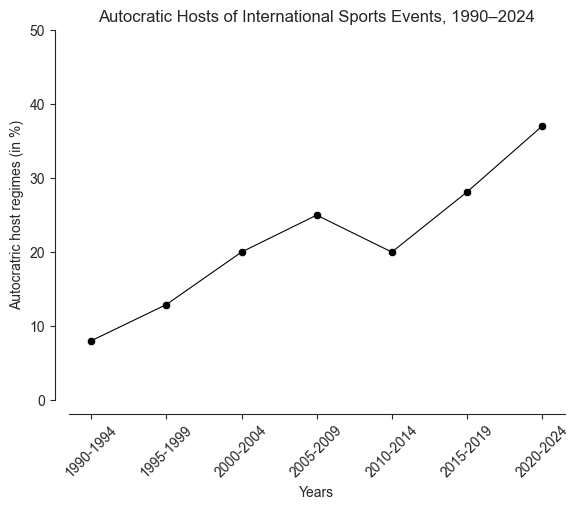

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_style("ticks")


_ = sns.lineplot(x='period', y= 'autochostperc', data=fig1, color = 'black', lw =0.8)
_ = sns.scatterplot(x='period', y= 'autochostperc', data=fig1, color = 'black')
sns.despine(trim = False, offset=10)
plt.xticks(rotation=45)



_.set(ylim=(0, 50),xlabel = 'Years', ylabel = 'Autocratric host regimes (in %)',title = 'Autocratic Hosts of International Sports Events, 1990–2024' )

plt.show()

Now, let's replicate Figure SI.1.1 from the Supporting Information.

We need to read the proper data.

In [27]:
sfig1 = pd.read_csv('data/figure_SI11_data.tab', sep ='\t')

Then, we need to match the `baseline` column with the corresponding sports events.

We create a new column, `sport`, and insert each event.

In [28]:
sfig1.loc[sfig1['baseline'] == 2.5,'sport'] = "Rugby World Cup"
sfig1.loc[sfig1['baseline'] == 5,'sport'] = "Winter Olympic Games"
sfig1.loc[sfig1['baseline'] == 7.5,'sport'] = "Summer Olympic Games"
sfig1.loc[sfig1['baseline'] == 10,'sport'] = "World Athletics Championships"
sfig1.loc[sfig1['baseline'] == 12.5,'sport'] = "Ice Hockey World Championships"
sfig1.loc[sfig1['baseline'] == 15,'sport'] = "FIFA World Cup"
sfig1.loc[sfig1['baseline'] == 17.5,'sport'] = "Cricket World Cup"
sfig1.loc[sfig1['baseline'] == 20,'sport'] = "World Handball Championship"
sfig1.loc[sfig1['baseline'] == 22.5,'sport'] = "World Table Tennis Championships"
sfig1.loc[sfig1['baseline'] == 25,'sport'] = "Basketball World Cup"
sfig1.loc[sfig1['baseline'] == 27.5,'sport'] = "Volleyball World Championship"

sfig1['hue'] = 'democ'
sfig1.loc[sfig1['democ'].isna(),'hue'] = 'autoc'

sfig1

,year,regime,baseline,democ,autoc,sport,hue
0,1987.0,0.0,2.5,3.0,NaN,Rugby World Cup,democ
1,1987.0,0.0,2.5,3.0,NaN,Rugby World Cup,democ
2,1991.0,0.0,2.5,3.0,NaN,Rugby World Cup,democ
3,1991.0,0.0,2.5,3.0,NaN,Rugby World Cup,democ
4,1995.0,1.0,2.5,NaN,2.0,Rugby World Cup,autoc
...,...,...,...,...,...,...,...
328,2010.0,0.0,27.5,28.0,NaN,Volleyball World Championship,democ
329,2014.0,0.0,27.5,28.0,NaN,Volleyball World Championship,democ
330,2018.0,0.0,27.5,28.0,NaN,Volleyball World Championship,democ
331,2018.0,0.0,27.5,28.0,NaN,Volleyball World Championship,democ


Now, we will create a scatterplot using the `year` column as the x-axis and the `sport` column as the y-axis.

C:\Users\mernick\AppData\Local\Temp\ipykernel_1612\2771623608.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  _.set_yticklabels(sports)


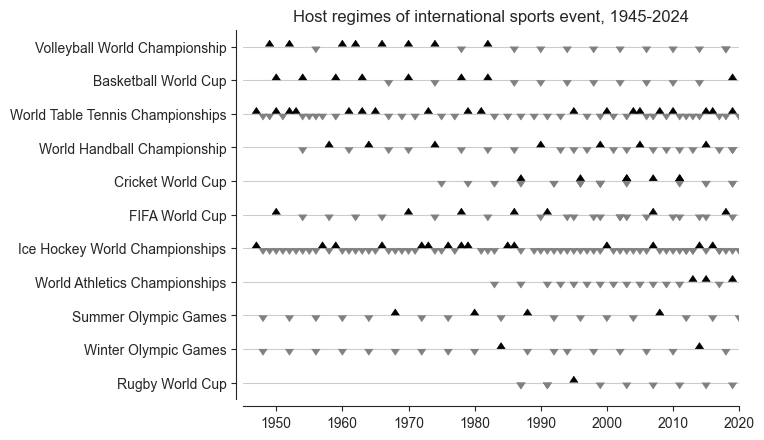

In [29]:
sns.set_style('whitegrid')
sns.set_style("ticks")

_ = sns.scatterplot(x='year', y= 'sport', hue='hue', data=sfig1, legend = False,
                   style = 'hue', markers = [11,10], palette=['grey','black'])
# _ = sns.scatterplot(x='year', y= 'sport', hue='hue', data=sfig1, legend = False,
#                    size = 'autoc', markers = "+",palette = ['grey'])

# _ = sns.scatterplot(x='year', y= 'baseline', hue='autoc', data=sfig1, color = 'black')

sns.despine(trim = False, offset=5)
# plt.xticks(rotation=45)
sports = ['Rugby World Cup', 'Winter Olympic Games', 'Summer Olympic Games','World Athletics Championships','Ice Hockey World Championships','FIFA World Cup','Cricket World Cup','World Handball Championship','World Table Tennis Championships','Basketball World Cup','Volleyball World Championship']

_.set_yticklabels(sports)
_.set(xlim=(1945, 2020), title = 'Host regimes of international sports event, 1945-2024',ylabel=None,xlabel=None)
_.invert_yaxis()
_.yaxis.grid(True)
plt.show()

Our scatterplot looks like this, so we have the right data.